<a href="https://colab.research.google.com/gist/manojkumark04/5d00016d533ea96384c7c58ca3482618/resume_skill_ml_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SKILLS for RESUME**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
resumeDataset = pd.read_csv("/content/drive/MyDrive/Practice Data set/UpdatedResumeDataSet.csv")

In [4]:
resumeDataset

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


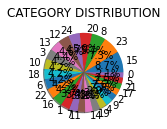

In [11]:
# plt.figure(figsize = (15,15))
plt.xticks(rotation = 90)
sns.countplot(y = "Category" , data = resumeDataset)
# plt.savefig("C:/Users/User/Downloads/archive_skill/jobcategory_details.tif")
# plt.show
targetCounts = resumeDataset["Category"].value_counts().reset_index()["Category"]
targetLabels = resumeDataset["Category"].value_counts().reset_index()["index"]
# square fig and axis
plt.figure(1, figsize = (25,25))
the_grid = GridSpec(2,2)
plt.subplot(the_grid[0,1], aspect = 1, title = "CATEGORY DISTRIBUTION")
source_pie = plt.pie(targetCounts, labels = targetLabels, autopct = "%1.1f%%", shadow = True,)
plt.show()

In [6]:

def cleanresume(resumetext):
  resumetext = re.sub("httpS+s*"," ", resumetext)
  resumetext = re.sub("RT|cc", " ",resumetext)
  resumetext = re.sub("#S+","", resumetext)
  resumetext = re.sub("@S+"," ",resumetext)
  resumetext = re.sub("[%s]" % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_'{|}~"""), " ", resumetext)
  resumetext = re.sub(r'[^x00-x7f]', " ", resumetext)
  resumetext = re.sub("s+", " ",resumetext)
  return resumetext
resumeDataset["cleaned_resume"] = resumeDataset.Resume.apply(lambda x: cleanresume(x))
var_mod = ["Category"]
le = LabelEncoder()
for i in var_mod:
    resumeDataset[i] = le.fit_transform(resumeDataset[i])
requiredText = resumeDataset["cleaned_resume"].values
requiredTarget = resumeDataset["Category"].values
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words = "english" , max_features = 1500)
word_vectorizer.fit(requiredText)
wordFeatures = word_vectorizer.transform(requiredText)


**MODEL BUILDING**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(wordFeatures, requiredTarget, random_state= 0, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)


(769, 1500)
(193, 1500)


In [8]:
prediction

array([20, 14,  6, 17, 15, 14, 10, 14, 15, 11,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16,  5,  8,  3, 24, 20, 18, 22,  7,
       23, 23, 22, 18,  7, 20, 10, 20, 14,  8, 15, 15,  8, 11,  4, 22,  1,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8,  7, 19,  4, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23, 11,  9, 23, 11, 15, 23, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 22,  6, 14,
        6,  0,  4,  5,  7,  9, 13, 23,  6,  9,  9, 21, 11,  5,  3,  9, 24,
       19, 13,  8,  3, 13, 13, 11, 20, 16, 23, 21, 24,  7, 21, 20, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2, 20,  7, 11, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23,  1, 23,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15])

In [9]:
print("accuracy of KNeighbors classifier on training set :{:.2f}".format(clf.score(X_train, y_train)))
print("accuracy of KNeighbors classifier on test set :{:.2f}".format(clf.score(X_test, y_test)))
print("n classification report for classifier %s:n%sn" % (clf,metrics.classification_report(y_test,prediction)))

accuracy of KNeighbors classifier on training set :0.99
accuracy of KNeighbors classifier on test set :0.99
n classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):n              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.